<a href="https://colab.research.google.com/github/titusjscott/multi-layer-perceptron/blob/main/most_current_airline_delay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/titusjscott/multi-layer-perceptron/main/airlines_delay.csv")

In [3]:
df.describe()

,Flight,Time,Length,DayOfWeek,Class
count,539382.000000,539382.000000,539382.000000,539382.000000,539382.000000
mean,2427.927988,802.728161,132.202104,3.929666,0.445443
std,2067.431700,278.045546,70.117045,1.914666,0.497015
min,1.000000,10.000000,0.000000,1.000000,0.000000
25%,712.000000,565.000000,81.000000,2.000000,0.000000
50%,1809.000000,795.000000,115.000000,4.000000,0.000000
75%,3745.000000,1035.000000,162.000000,5.000000,1.000000
max,7814.000000,1439.000000,655.000000,7.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Flight       539382 non-null  float64
 1   Time         539382 non-null  float64
 2   Length       539382 non-null  float64
 3   Airline      539382 non-null  object 
 4   AirportFrom  539382 non-null  object 
 5   AirportTo    539382 non-null  object 
 6   DayOfWeek    539382 non-null  int64  
 7   Class        539382 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 32.9+ MB


In [5]:
df.head(10)

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0
5,3692.0,580.0,60.0,WN,MSY,BHM,4,0
6,1135.0,690.0,239.0,CO,EWR,DFW,4,0
7,1300.0,1210.0,80.0,AA,DFW,MEM,3,0
8,587.0,1295.0,105.0,FL,BWI,GRR,7,0
9,764.0,530.0,108.0,FL,ATL,PBI,3,0


In [6]:
df.isna().sum()

Flight         0
Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64

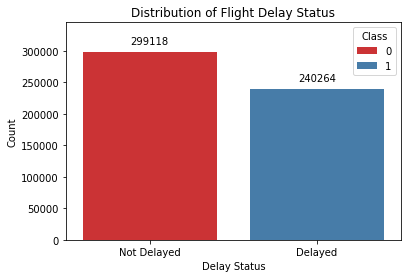

In [7]:
# bar chart to show distribution of the Class

ax = sns.countplot(x='Class', hue='Class', data=df, palette='Set1', dodge=False)
plt.xlabel('Delay Status')
plt.ylabel('Count')
plt.title('Distribution of Flight Delay Status')
plt.xticks([0,1], ['Not Delayed', 'Delayed'])

# expand the y axis so that the "Count" values show properly
plt.ylim(0, ax.get_ylim()[1] * 1.1)

# insert the "Count" value on the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
    
plt.show()

In [8]:
# remove the unnecessary ID column
df = df.iloc[:,1:]

In [9]:
# identify the unique values of the string features

print(df['Airline'].value_counts())

print(df['AirportFrom'].value_counts())

print(df['AirportTo'].value_counts())

WN    94097
DL    60940
OO    50254
AA    45656
MQ    36604
US    34500
XE    31126
EV    27983
UA    27619
CO    21118
FL    20827
9E    20686
B6    18112
YV    13725
OH    12630
AS    11471
F9     6456
HA     5578
Name: Airline, dtype: int64
ATL    34449
ORD    24822
DFW    22153
DEN    19843
LAX    16657
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: AirportFrom, Length: 293, dtype: int64
ATL    34440
ORD    24871
DFW    22153
DEN    19848
LAX    16656
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: AirportTo, Length: 293, dtype: int64


There are 18 Airline Codes and 293 unique Airports for both From and TO.

In [10]:
# convert the string features to integer features

from sklearn.preprocessing import LabelBinarizer, MinMaxScaler, Normalizer, LabelEncoder

le = LabelEncoder()
df['Airline'] = le.fit_transform(df['Airline'])

df['AirportFrom'] = le.fit_transform(df['AirportFrom'])

df['AirportTo'] = le.fit_transform(df['AirportTo'])


In [11]:
#df['Time'] = pd.to_datetime(df['Time'])
#minute = df['Time'].dt.minute

In [12]:
# convert "Time" using the sine cosine method to address cyclic nature

#df['sin_time'] = np.sin(2*np.pi*minute/1440)

#df['cos_time'] = np.cos(2*np.pi*minute/1440)

In [13]:
df['hour'] = df['Time'] // 60
df['minute'] = df['Time'] % 60

# Apply sine-cosine transformation
hour_sin = np.sin(2 * np.pi * df['hour'] / 24)
hour_cos = np.cos(2 * np.pi * df['hour'] / 24)
minute_sin = np.sin(2 * np.pi * df['minute'] / 60)
minute_cos = np.cos(2 * np.pi * df['minute'] / 60)

# Add transformed features to the dataframe
df['hour_sin'] = hour_sin
df['hour_cos'] = hour_cos
df['minute_sin'] = minute_sin
df['minute_cos'] = minute_cos

In [14]:
df.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class,hour,minute,hour_sin,hour_cos,minute_sin,minute_cos
0,1296.0,141.0,5,16,129,1,0,21.0,36.0,-0.707107,7.071068e-01,-5.877853e-01,-0.809017
1,360.0,146.0,12,65,208,4,0,6.0,0.0,1.000000,6.123234e-17,0.000000e+00,1.000000
2,1170.0,143.0,3,35,60,3,0,19.0,30.0,-0.965926,2.588190e-01,5.665539e-16,-1.000000
3,1410.0,344.0,14,203,217,6,0,23.0,30.0,-0.258819,9.659258e-01,5.665539e-16,-1.000000
4,692.0,98.0,8,32,16,4,0,11.0,32.0,0.258819,-9.659258e-01,-2.079117e-01,-0.978148


In [15]:
# move class to index positon 0 to make manipulation easier

cols = list(df.columns)
cols = [cols[6]] + cols[:6] + cols[7:]
df = df[cols]

df.head()

,Class,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,hour,minute,hour_sin,hour_cos,minute_sin,minute_cos
0,0,1296.0,141.0,5,16,129,1,21.0,36.0,-0.707107,7.071068e-01,-5.877853e-01,-0.809017
1,0,360.0,146.0,12,65,208,4,6.0,0.0,1.000000,6.123234e-17,0.000000e+00,1.000000
2,0,1170.0,143.0,3,35,60,3,19.0,30.0,-0.965926,2.588190e-01,5.665539e-16,-1.000000
3,0,1410.0,344.0,14,203,217,6,23.0,30.0,-0.258819,9.659258e-01,5.665539e-16,-1.000000
4,0,692.0,98.0,8,32,16,4,11.0,32.0,0.258819,-9.659258e-01,-2.079117e-01,-0.978148


In [16]:
# drop Time, hour, and minute to avoid redundancy and collinearity
df.drop(['Time', 'hour', 'minute'], axis = 1, inplace = True)

df.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Class,Length,Airline,AirportFrom,AirportTo,DayOfWeek,hour_sin,hour_cos,minute_sin,minute_cos
0,0,141.0,5,16,129,1,-0.707107,7.071068e-01,-5.877853e-01,-0.809017
1,0,146.0,12,65,208,4,1.000000,6.123234e-17,0.000000e+00,1.000000
2,0,143.0,3,35,60,3,-0.965926,2.588190e-01,5.665539e-16,-1.000000
3,0,344.0,14,203,217,6,-0.258819,9.659258e-01,5.665539e-16,-1.000000
4,0,98.0,8,32,16,4,0.258819,-9.659258e-01,-2.079117e-01,-0.978148


In [17]:
# divide df into Y as our Class and X to include our features

y = df.Class

x = df.drop('Class', axis = 1)

x.head()


,Length,Airline,AirportFrom,AirportTo,DayOfWeek,hour_sin,hour_cos,minute_sin,minute_cos
0,141.0,5,16,129,1,-0.707107,7.071068e-01,-5.877853e-01,-0.809017
1,146.0,12,65,208,4,1.000000,6.123234e-17,0.000000e+00,1.000000
2,143.0,3,35,60,3,-0.965926,2.588190e-01,5.665539e-16,-1.000000
3,344.0,14,203,217,6,-0.258819,9.659258e-01,5.665539e-16,-1.000000
4,98.0,8,32,16,4,0.258819,-9.659258e-01,-2.079117e-01,-0.978148


In [18]:
scaler = MinMaxScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

x.head()

,Length,Airline,AirportFrom,AirportTo,DayOfWeek,hour_sin,hour_cos,minute_sin,minute_cos
0,0.215267,0.294118,0.054795,0.441781,0.000000,0.146447,0.853553,0.206107,0.095492
1,0.222901,0.705882,0.222603,0.712329,0.500000,1.000000,0.500000,0.500000,1.000000
2,0.218321,0.176471,0.119863,0.205479,0.333333,0.017037,0.629410,0.500000,0.000000
3,0.525191,0.823529,0.695205,0.743151,0.833333,0.370590,0.982963,0.500000,0.000000
4,0.149618,0.470588,0.109589,0.054795,0.500000,0.629410,0.017037,0.396044,0.010926


<AxesSubplot:>

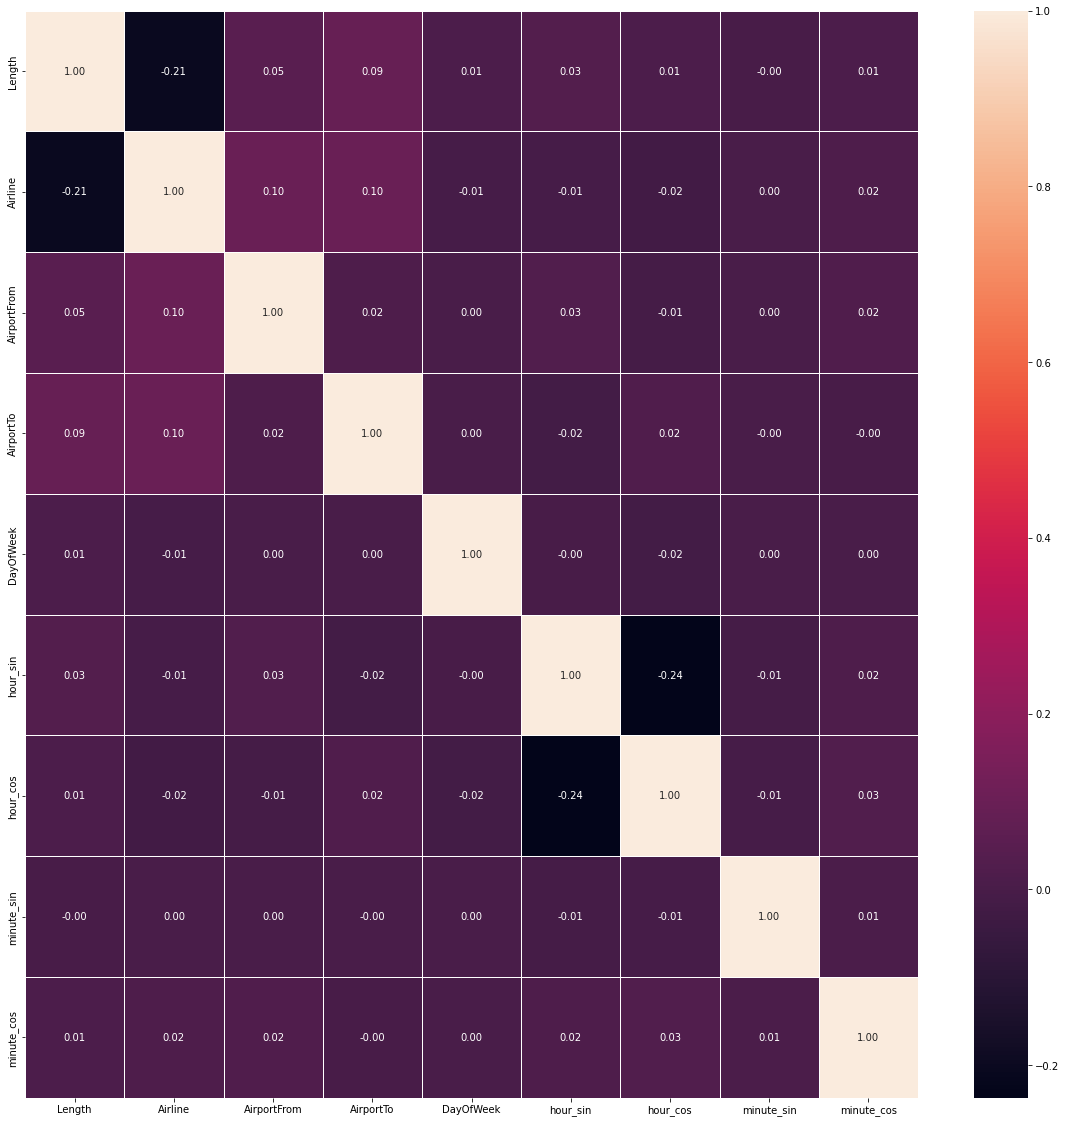

In [19]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt='.2f', ax=ax)

Install necessary packages and imports for UMAP

In [20]:
!pip install umap-learn
!pip install pynndescent
!pip install datashader

import numpy
import scipy
import sklearn
import numba
import pynndescent
import matplotlib
import datashader
import holoviews
import umap
import umap.plot
from sklearn.datasets import load_digits

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=3c02d204119c67a51fa57da7be2efffda98b277ca35698b6e426bd1b2fcbb8e8
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=9c04db18620e86026a1c50a28d1bd2b316028b7f16003bfd214d3ca66c5f882b
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/pu

In [21]:
#reducer = umap.UMAP()
#embedding = reducer.fit_transform(x)

# Create a scatter plot
#sns.scatterplot(
 #   embedding[:, 0], embedding[:, 1], hue=df.iloc[:,0].astype('category').cat.codes,
  #  cmap='viridis', alpha=0.9, legend = "full"
#)

In [28]:
import warnings; warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# Split data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Specify Classifier
mlp = MLPClassifier(max_iter=100)

# Hyper-parameter space to optimize MLP
parameter_search = {
    'hidden_layer_sizes': [(250,15), (96,48)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant'],
}

from sklearn.model_selection import GridSearchCV

g_search = GridSearchCV(mlp, parameter_search, n_jobs=-1, cv=2)
g_search.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(250, 15), (96, 48)],
                         'learning_rate': ['constant'], 'solver': ['adam']})

In [29]:
# All results
means = g_search.cv_results_['mean_test_score']
stds = g_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, g_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.640 (+/-0.006) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (250, 15), 'learning_rate': 'constant', 'solver': 'adam'}
0.643 (+/-0.004) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (96, 48), 'learning_rate': 'constant', 'solver': 'adam'}
0.641 (+/-0.005) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (250, 15), 'learning_rate': 'constant', 'solver': 'adam'}
0.641 (+/-0.006) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (96, 48), 'learning_rate': 'constant', 'solver': 'adam'}
0.643 (+/-0.000) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (250, 15), 'learning_rate': 'constant', 'solver': 'adam'}
0.644 (+/-0.003) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (96, 48), 'learning_rate': 'constant', 'solver': 'adam'}
0.643 (+/-0.004) for {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (250, 15), 'learning_rate': 'constant', 'solver': 'adam'}
0.644 (+/-0.001) fo

In [30]:
print('Best parameters found: \n', g_search.best_params_)

Best parameters found: 
 {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (96, 48), 'learning_rate': 'constant', 'solver': 'adam'}
